<a href="https://colab.research.google.com/github/hemanthgupta29/hemanth_info5731_Spring2020/blob/main/Inclass_exercise_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("amazon_mobile.csv")
df.head(100)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0
...,...,...,...,...,...,...
95,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,very well,0
96,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,1,Cannot connect to GSM network,0
97,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"This cell phone exceeded my expectations, it's...",1
98,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"pros.. it works fine, its easy to use, not too...",1


In [2]:
# Text Preprocessing
df['Text'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Text'] = df['Text'].str.replace('[^\w\s]','')
from textblob import Word
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
df['Text'].head(10)

0    feel lucky found used phone u used hard phone ...
1    nice phone nice grade pantach revue clean set ...
2                                              pleased
3          work good go slow sometimes good phone love
4    great phone replace lost phone thing volume bu...
5    already phone problem know stated used dang st...
6    charging port loose got soldered needed new ba...
7    phone look good wouldnt stay charged buy new b...
8    originally using samsung s2 galaxy sprint want...
9    battery life great responsive touch issue some...
Name: Text, dtype: object

In [4]:
# TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_vects = tfidf_vect.fit_transform(df['Text'].values)

In [5]:
names= tfidf_vect.get_feature_names()

In [6]:
# K Means
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 9,init='k-means++', n_jobs = -1,max_iter=10000, random_state=50)
model.fit(tfidf_vects)
from collections import Counter
Counter(model.labels_)

Counter({0: 17, 1: 14, 2: 76, 3: 9, 4: 31, 5: 63, 6: 9, 7: 10, 8: 71})

In [7]:
labels = model.labels_
cluster_center=model.cluster_centers_
cluster_center

array([[0.        , 0.03722585, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00262557, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.02876097, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00293718, 0.        , ..., 0.00172561, 0.        ,
        0.00172489]])

In [8]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(tfidf_vects, model.labels_, metric='euclidean')
silhouette_score

0.06048790077024961

In [9]:

#DBSCAN
Text_reviews=[]
for i in df['Text']:
  Text_reviews.append(i.split())
import gensim
w2v_model=gensim.models.Word2Vec(Text_reviews, size=100, workers=4)

In [10]:
import numpy as np
vectors = []
for i in Text_reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)  
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [11]:
from sklearn.cluster import DBSCAN
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

In [12]:

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

In [13]:

vectors.shape

(300, 100)

In [14]:
neighbor = []
for val in vectors[:300]:
    neighbor.append(compute200thnearestneighbour(val, vectors[:300]))
neighbor.sort()

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

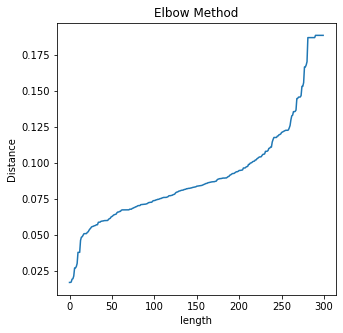

In [18]:
# Plotting for the Elbow Method :
plt.figure(figsize=(5,5))
plt.title("Elbow Method")
plt.plot([x for x in range(len(neighbor))], neighbor)
plt.xlabel("length")
plt.ylabel("Distance")
plt.show()

K-means is a centroid-based or partition-based clustering algorithm.  This algorithm partitions all the points in the sample space into K groups of similarity. The similarity is usually measured using Euclidian Distance  DBScan is a density-based clustering algorithm. The key fact of this algorithm is that the neighbourhood of each point in a cluster which is within a given radius (R) must have a minimum number of points (M). This algorithm has proved extremely efficient in detecting outliers and handling noise

Clusters formed are more or less spherical or convex in shape and must have same feature size.	Clusters formed are arbitrary in shape and may not have same feature size. Clusters formed are more or less spherical or convex in shape and must have same feature size.	Clusters formed are arbitrary in shape and may not have same feature size.